In [1]:
import numpy as np
import scipy.stats as ss

In [3]:
type(ss.norm.rvs(size=20))
ss.norm.rvs(size =20)

array([-0.66098824, -0.23061184, -3.09817427, -1.72648914, -0.66730119,
        0.95288832, -1.94193354, -0.91966559,  0.91871298, -2.11493472,
       -1.41727621,  1.82694758, -0.04015319,  0.80195036, -1.36023944,
       -2.51606071, -1.13299571, -0.26434343,  0.27692092,  0.93488233])

In [8]:
norm_array = ss.norm.rvs(size=20)
norm_array

array([ 0.74651571,  2.38332413, -0.17311466,  0.66167008,  0.05008665,
        0.29409061,  0.84687471, -0.72487396, -0.54650459,  1.22553965,
        1.1050594 ,  1.33220706, -0.34468193, -0.35877748,  0.18935559,
        2.56419758,  1.37229847, -1.1674951 ,  0.00324629,  1.83398113])

In [10]:
## 检测正态分布
ss.normaltest(norm_array)

NormaltestResult(statistic=0.7207724430069739, pvalue=0.6974069204998901)

In [11]:
## 因为我们的显著性水平定为0.05，所以符合要求
## chi2检验
ss.chi2_contingency([[15,95],[85,5]])

(126.08080808080808,
 2.9521414005078985e-29,
 1,
 array([[55., 55.],
        [45., 45.]]))

In [36]:
ss.ttest_ind(ss.norm.rvs(size=10),ss.norm.rvs(size=20))

Ttest_indResult(statistic=0.565639528128456, pvalue=0.5761440639900315)

In [37]:
## 方差检验
ss.f_oneway([49,5,39,40,43],[28,32,30,26,34],[38,40,45,42,48])

F_onewayResult(statistic=1.8447852760736203, pvalue=0.2001802086872447)

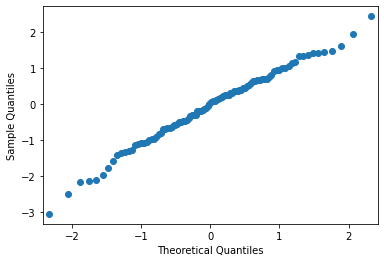

In [38]:
## QQ图 
from statsmodels.graphics.api import qqplot
from matplotlib import pyplot as plt
plt.show(qqplot(ss.norm.rvs(size=100)))

In [40]:
# 相关系数
import pandas as pd
s1 = pd.Series([0.1,0.2,1.1,2.4,1.3,0.3,0.5])
s2 = pd.Series([0.5,0.4,1.2,2.5,1.1,0.7,0.1])
s1.corr(s2)

0.9333729600465923

In [41]:
s1.corr(s2,method="spearman")

0.7142857142857144

In [43]:
df = pd.DataFrame([s1,s2])
df

,0,1,2,3,4,5,6
0,0.1,0.2,1.1,2.4,1.3,0.3,0.5
1,0.5,0.4,1.2,2.5,1.1,0.7,0.1


In [44]:
df.corr()

,0,1,2,3,4,5,6
0,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0
1,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0
2,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0
3,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0
4,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0
5,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0
6,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0


In [47]:
# 上面这个操作是错误的，我们的corr会对与列进行计算
df = pd.DataFrame(np.array([s1,s2]).T)
df

,0,1
0,0.1,0.5
1,0.2,0.4
2,1.1,1.2
3,2.4,2.5
4,1.3,1.1
5,0.3,0.7
6,0.5,0.1


In [48]:
df.corr()

,0,1
0,1.000000,0.933373
1,0.933373,1.000000


In [49]:
df.corr(method="spearman")

,0,1
0,1.000000,0.714286
1,0.714286,1.000000


In [58]:
# 回归
x = np.arange(10).astype(float).reshape((10,1))
y = x*3+4+np.random.random((10,1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.],
       [6.],
       [7.],
       [8.],
       [9.]])

In [59]:
y

array([[ 4.46329217],
       [ 7.23046688],
       [10.52704023],
       [13.72227685],
       [16.6754865 ],
       [19.45901811],
       [22.00419183],
       [25.53233946],
       [28.05836973],
       [31.60186889]])

In [60]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
res = reg.fit(x,y)

In [65]:
y_predic = res.predict(x)
y_predic

array([[ 4.49020916],
       [ 7.47625936],
       [10.46230956],
       [13.44835976],
       [16.43440997],
       [19.42046017],
       [22.40651037],
       [25.39256057],
       [28.37861077],
       [31.36466097]])

In [66]:
res.coef_

array([[2.9860502]])

In [67]:
res.intercept_

array([4.49020916])

In [69]:
## PCA变换
data = np.array([np.array([2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1]),
                 np.array([2.4,0.7,2.9,2.2,3.,2.7,1.6,1.1,1.6,0.9])]).T
data

array([[2.5, 2.4],
       [0.5, 0.7],
       [2.2, 2.9],
       [1.9, 2.2],
       [3.1, 3. ],
       [2.3, 2.7],
       [2. , 1.6],
       [1. , 1.1],
       [1.5, 1.6],
       [1.1, 0.9]])

In [71]:
from sklearn.decomposition import PCA
lower_dim = PCA(n_components=1)
lower_dim.fit(data)
lower_dim.explained_variance_ratio_

array([0.96318131])

In [72]:
lower_dim.transform(data)
## sklearn use SVD-Singular Value Decomposition

array([[-0.82797019],
       [ 1.77758033],
       [-0.99219749],
       [-0.27421042],
       [-1.67580142],
       [-0.9129491 ],
       [ 0.09910944],
       [ 1.14457216],
       [ 0.43804614],
       [ 1.22382056]])

In [80]:
## we can define our PCA
import pandas as pd
import numpy as np
def myPCA(data,n_components=1000000):
    ## n_components will be the number of final dimension
    mean_vals = np.mean(data,axis=0)
    ## Axis is used to define properties for arrays that are more than one 
    # dimension. Two-dimensional data has two axes: axis 0 runs vertically 
    # down the row and axis 1 runs horizontally along the column.
    mid = data-mean_vals
    ## totally substarct the mean
    cov_mat = np.cov(mid,rowvar=False)
    ## get the covariance,not focus on row
    from scipy import linalg
    ## linalg maens linear algebra function
    eig_vals,eig_vects = linalg.eig(np.mat(cov_mat))
    ## Find the eigenvalues and eigenvectors of the covariance matrix
    eig_val_index = np.argsort(eig_vals)
    eig_val_index = eig_val_index[:-(n_components+1):-1]
    ## Take out the eigenvector corresponding to the largest eigenvalue
    eig_vects = eig_vects[:,eig_val_index]
    low_dim_mat = np.dot(mid,eig_vects)
    return low_dim_mat,eig_vals
    

In [81]:
data = np.array([np.array([2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1]),
                 np.array([2.4,0.7,2.9,2.2,3.,2.7,1.6,1.1,1.6,0.9])]).T
print(myPCA(data,n_components=1))

(array([[-0.82797019],
       [ 1.77758033],
       [-0.99219749],
       [-0.27421042],
       [-1.67580142],
       [-0.9129491 ],
       [ 0.09910944],
       [ 1.14457216],
       [ 0.43804614],
       [ 1.22382056]]), array([0.0490834 +0.j, 1.28402771+0.j]))
